# Semana 3: Clasificador Naive de Bayes

Jose Manuel Coello

## Objetivo

En esta tarea trabajaremos con el conjunto de datos de “TV Show and
Movies” utilizado en la semana uno para crear un clasificador utilizando
el modelo Naive Bayes, en este caso utilizaré la variable `duration`
para clasificar si el tipo de show es una película o una serie, para
ello se aplicará una serie de tratamiento de datos y visualización de
los mismos para luego aplicar el modelo con nuestra variable predictora
(tiempo de duración) y clasificar el tipo de show (Movie o TV Show), el
objetivo es que el clasificador aprenda del conjunto de datos para que
luego tenga la capacidad de generalizar cuando se le suministren datos
nuevos con los que no fue entrenado.

## Carga de librerías o módulos

Para lograr el objetivo deseado se utilizarán un conjunto de módulos en
python la cual será la herramienta utilizada.

In [1]:
import numpy as np
import math
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

Cargamos el conjunto de datos

In [2]:
df_movie = pd.read_csv('Movies_and_TV_Shows.csv')
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


En este caso se quiere clasificar la variable `type` utilizando
`duration` como variable predictora, sin embargo la variable `duration`
no esta expresada en una única unidad de medida, esta variable para las
*Movies* esta expresada en minutos y para los *TV Shows* viene dada en
temporadas (seasons), para estandarizar la variable en una única unidad
de medida vamos a trabajar con una variable que llamaremos `dura` la
cual mide el tiempo en horas, vamos a suponer para efectos prácticos que
todos los *TV Shows* por temporada tienen cinco capítulos y cada
capítulo tiene una duración de cuarenta minutos, de esta manera tenemos
cada uno de los registros medidos en minutos y luego procedemos a
transformarlos a hora dividiendo por sesenta.

In [3]:
cap, time = 5, 40
hours = lambda x, y: (int(y.split(' ')[0]) * cap * time)/60 if x == 'TV Show' else int(y.split(' ')[0])/60

dura = list(
  map(lambda x, y: round(hours(x, y), 2), df_movie['type'], df_movie['duration'])
  )

df_movie = df_movie.assign(dura = dura)
df_movie[['type', 'duration', 'dura']]

,type,duration,dura
0,Movie,113 min,1.88
1,Movie,110 min,1.83
2,Movie,74 min,1.23
3,Movie,69 min,1.15
4,Movie,45 min,0.75
...,...,...,...
9663,Movie,60 min,1.00
9664,TV Show,4 Seasons,13.33
9665,Movie,90 min,1.50
9666,TV Show,1 Season,3.33


Una vez teniendo la variable `dura` en una unidad de medida estándar
(horas) para todos los registros, procedemos a realizar un *scatter
plot* donde se pueda apreciar que tan separados o que tan homogéneos son
los tiempos de duración dependiendo del tipo de show (Movie o TV Show)

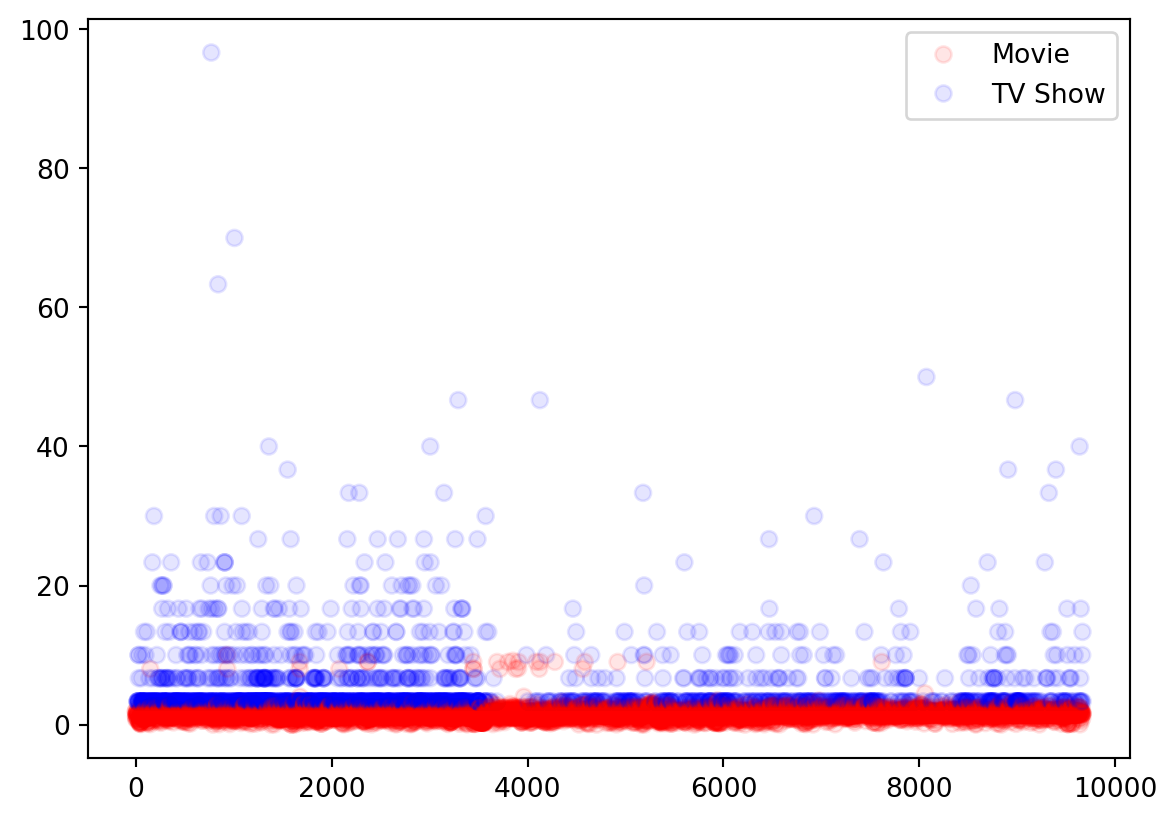

In [4]:
fig, ax = plt.subplots()

n = df_movie.shape[0]
x = list(range(1, n+1))
y = list(df_movie['dura'])
c = [1 if t == 'Movie' else 2 for t in df_movie['type']]
classes = list(df_movie['type'].unique())
colors = ListedColormap(['red', 'blue'])

scatter = ax.scatter(x, y, c = c, cmap = colors, alpha = 0.1)

plt.legend(handles = scatter.legend_elements()[0], labels = classes)
plt.show()

Se puede decir que se tiene una separación lógica entre la duración de
un *TV Show* y una *Movie* ya que los *TV Shows* vienen dados por
temporadas donde cada temporada estamos asumiendo que esta compuesta por
cinco capítulos de duración cuarenta minutos. Ya teniedo nuestra
variable predictora estandarizada en una unidad de tiempo procedemos a
realizar la partición de los datos donde tendremos un 70% de los datos
para entrenar el modelo y un 30% de los datos para probar el nivel de
predictibilidad del modelo. Las categorías de nuestra variable respuesta
en este caso serán `Movies = 1` y `TV Show = 2`

In [5]:
pred_var = np.array(df_movie['dura']).reshape(-1,1)
response = np.array(c).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(
  pred_var, response, test_size = 0.3, random_state = 125
  )

print("x_train:", x_train)
print("x_test:", x_test)
print("y_train:", y_train)
print("y_test:", y_test)

x_train: [[ 1.47]
 [ 3.33]
 [16.67]
 ...
 [ 1.18]
 [ 2.67]
 [40.  ]]
x_test: [[3.33]
 [3.33]
 [2.25]
 ...
 [0.57]
 [0.52]
 [0.92]]
y_train: [[1]
 [2]
 [2]
 ...
 [1]
 [1]
 [2]]
y_test: [[2]
 [2]
 [1]
 ...
 [1]
 [1]
 [1]]


Procedemos a construir el clasificador Naive de Bayes llamando la
funcion `GaussianNB()` del módulo sklearn de python

In [6]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train.ravel())

# Predict Output
predicted = model.predict([x_test[6]])

print(y_test)
print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

[[2]
 [2]
 [1]
 ...
 [1]
 [1]
 [1]]
Actual Value: [1]
Predicted Value: 1


Procedemos a verificar algunas métricas que nos indican el nivel de
predictibilidad del modelo como lo son el `acurracy` que nos indica la
proporción de instancias predichas de manera correcta entre el total de
instancias predichas y el `F score` este puede ser interpretado como una
media armónica de la precisión y el recall, donde el `F score` alcanza
su mejor valor en 1 y su peor valor en 0. La relativa contribución de
precisión y recall a el `F score` son iguales, la formula del `F score`
es `F1 = 2 * (precision * recall) / (precision + recall)`, donde la
precisión representa el porcentaje de registros que fue clasificado de
manera correcta a la clase “positiva”
`precision = verdaderos positivos / (verdaderos positivos + falsos positivos)`
mientras que el recall o exahustividad indica que porcentaje de
registros que pertenecen a la clase “positiva” que fue clasificado
correctamente
`recall = verdaderos positivos / (verdaderos positivos + falsos negativos)`

In [7]:
y_pred = model.predict(x_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average = "weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9955187866253016
F1 Score: 0.9954985268832891


Por último observamos la matriz de confusión, esta es una matriz
cuadrada en la cual se exponen del lado izquierdo (filas) las verdaderas
clases y del lado derecho (columnas) las clases predichas por el modelo,
la diagonal principal de la matriz contiene las clases que fueron
clasificadas correctamente (verdaderos negativos y verdaderos positivos)
mientras que en este caso por ser una matriz *2 x 2* la diagonal
secundaria contiene las clases clasificadas de forma errónea (falsos
positivos y falsos negativos).

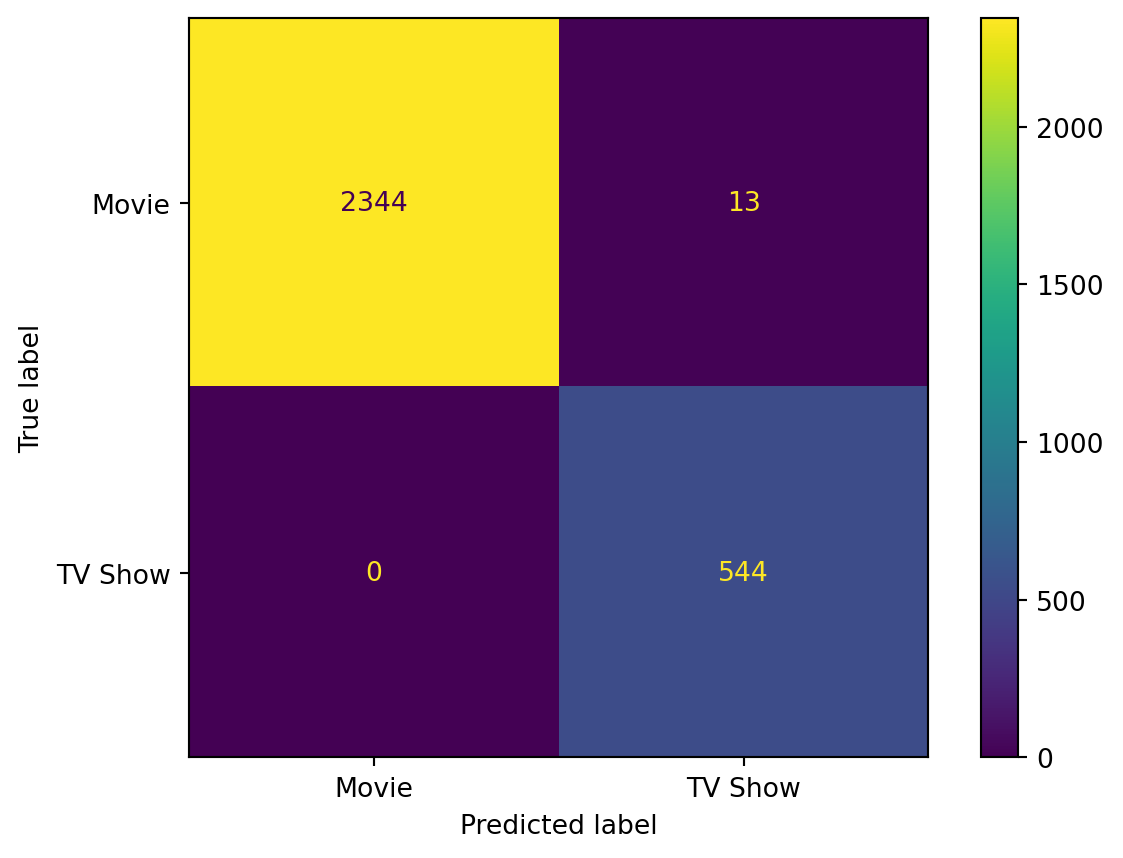

In [8]:
cm = confusion_matrix(y_test, y_pred, labels = [1,2])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
disp.plot()
plt.show()